In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
plt.rcParams["figure.figsize"] = (14,6)

In [153]:
confirmed = pd.read_csv("../data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
deaths = pd.read_csv("../data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recovered = pd.read_csv("../data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [154]:
confirmed.rename(columns={"Country/Region":"Country", "Province/State":"Province"}, inplace=True)
recovered.rename(columns={"Country/Region":"Country", "Province/State":"Province"}, inplace=True)
deaths.rename(columns={"Country/Region":"Country", "Province/State":"Province"}, inplace=True)

In [155]:
confirmed = confirmed.drop(columns=["Lat", "Long"]).set_index(["Country", "Province"]).T
recovered = recovered.drop(columns=["Lat", "Long"]).set_index(["Country", "Province"]).T
deaths = deaths.drop(columns=["Lat", "Long"]).set_index(["Country", "Province"]).T

In [156]:
infected = confirmed - recovered - deaths

In [157]:
data = pd.concat([infected, recovered, deaths, confirmed], axis=1, keys=["I", "R", "D", "C"]).swaplevel(0, 2, axis=1).swaplevel(0,1,axis=1).sort_index(axis=1)

In [158]:
data.index.name = "date"

In [159]:
data.isna().sum().sum()

2100

In [160]:
ds = data.isna().sum()
ds[ds != 0]

Country  Province                    
Canada   Alberta                    I    140
         British Columbia           I    140
         Diamond Princess           I    140
         Grand Princess             I    140
         Manitoba                   I    140
         New Brunswick              I    140
         Newfoundland and Labrador  I    140
         Northwest Territories      I    140
         Nova Scotia                I    140
         Ontario                    I    140
         Prince Edward Island       I    140
         Quebec                     I    140
         Saskatchewan               I    140
         Yukon                      I    140
         NaN                        I    140
dtype: int64

In [161]:
data.loc[:, "Canada"]

Province Alberta          British Columbia          Diamond Princess         \
               C    D   I                C    D   I                C  D   I   
date                                                                          
1/22/20        0    0 NaN                0    0 NaN                0  0 NaN   
1/23/20        0    0 NaN                0    0 NaN                0  0 NaN   
1/24/20        0    0 NaN                0    0 NaN                0  0 NaN   
1/25/20        0    0 NaN                0    0 NaN                0  0 NaN   
1/26/20        0    0 NaN                0    0 NaN                0  0 NaN   
...          ...  ...  ..              ...  ...  ..              ... ..  ..   
6/5/20      7098  146 NaN             2632  167 NaN                0  1 NaN   
6/6/20      7138  146 NaN             2632  167 NaN                0  1 NaN   
6/7/20      7138  146 NaN             2632  167 NaN                0  1 NaN   
6/8/20      7202  149 NaN             2659  167 NaN                0  1 NaN   
6/9/20      7229  151 NaN             2669  167 NaN                0  1 NaN   

Province Grand Princess  ... Quebec     Saskatchewan         Yukon        NaN  \
                      C  ...      D   I            C   D   I     C  D   I   I   
date                     ...                                                    
1/22/20               0  ...      0 NaN            0   0 NaN     0  0 NaN NaN   
1/23/20               0  ...      0 NaN            0   0 NaN     0  0 NaN NaN   
1/24/20               0  ...      0 NaN            0   0 NaN     0  0 NaN NaN   
1/25/20               0  ...      0 NaN            0   0 NaN     0  0 NaN NaN   
1/26/20               0  ...      0 NaN            0   0 NaN     0  0 NaN NaN   
...                 ...  ...    ...  ..          ...  ..  ..   ... ..  ..  ..   
6/5/20               13  ...   4935 NaN          649  11 NaN    11  0 NaN NaN   
6/6/20               13  ...   4970 NaN          650  11 NaN    11  0 NaN NaN   
6/7/20               13  ...   4978 NaN          650  11 NaN    11  0 NaN NaN   
6/8/20               13  ...   4984 NaN          654  13 NaN    11  0 NaN NaN   
6/9/20               13  ...   5029 NaN          656  13 NaN    11  0 NaN NaN   

Province         
              R  
date             
1/22/20       0  
1/23/20       0  
1/24/20       0  
1/25/20       0  
1/26/20       0  
...         ...  
6/5/20    53074  
6/6/20    54087  
6/7/20    54675  
6/8/20    55343  
6/9/20    56117  

[140 rows x 44 columns]

In [162]:
data = data.drop(columns=["Canada"], level=0)

In [163]:
data.isna().sum().sum()

0

In [164]:
data = data.rolling(window=7).mean().dropna().astype("int64")
data

Country  Afghanistan                   Albania               Algeria       \
Province         NaN                       NaN                   NaN        
                   C    D      I     R       C   D    I    R       C    D   
date                                                                        
1/28/20            0    0      0     0       0   0    0    0       0    0   
1/29/20            0    0      0     0       0   0    0    0       0    0   
1/30/20            0    0      0     0       0   0    0    0       0    0   
1/31/20            0    0      0     0       0   0    0    0       0    0   
2/1/20             0    0      0     0       0   0    0    0       0    0   
...              ...  ...    ...   ...     ...  ..  ...  ...     ...  ...   
6/5/20         16611  277  14851  1482    1165  33  246  886    9614  667   
6/6/20         17329  288  15482  1557    1181  33  252  895    9726  674   
6/7/20         18063  303  16124  1636    1196  33  258  905    9834  682   
6/8/20         18801  318  16741  1742    1214  33  265  915    9942  690   
6/9/20         19508  334  17260  1913    1233  33  274  924   10050  698   

Country   ... Yemen     Zambia              Zimbabwe              
Province  ...   NaN        NaN                   NaN              
          ...     I   R      C  D    I    R        C  D    I   R  
date      ...                                                     
1/28/20   ...     0   0      0  0    0    0        0  0    0   0  
1/29/20   ...     0   0      0  0    0    0        0  0    0   0  
1/30/20   ...     0   0      0  0    0    0        0  0    0   0  
1/31/20   ...     0   0      0  0    0    0        0  0    0   0  
2/1/20    ...     0   0      0  0    0    0        0  0    0   0  
...       ...   ...  ..    ... ..  ...  ...      ... ..  ...  ..  
6/5/20    ...   282  16   1079  7  198  874      212  4  178  29  
6/6/20    ...   300  17   1084  7  184  893      227  4  192  30  
6/7/20    ...   317  18   1089  7  170  912      242  4  206  31  
6/8/20    ...   332  20   1104  7  185  912      254  4  216  33  
6/9/20    ...   343  21   1120  7  200  912      269  4  229  36  

[134 rows x 1008 columns]

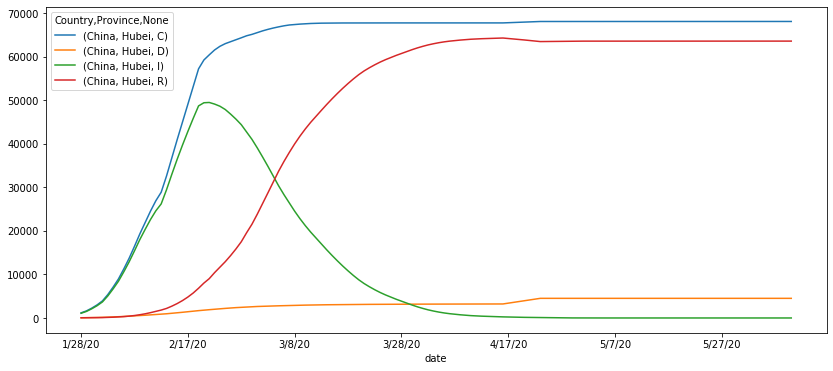

In [165]:
data.loc[:, pd.IndexSlice["China", "Hubei", :]].plot()

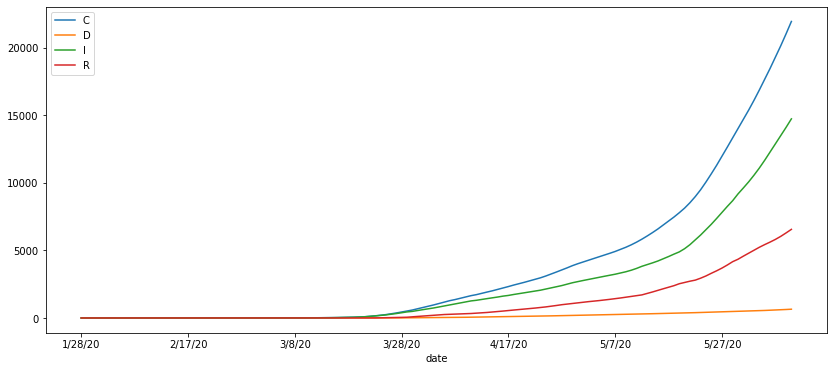

In [166]:
data.Argentina.droplevel(0, axis=1).plot()

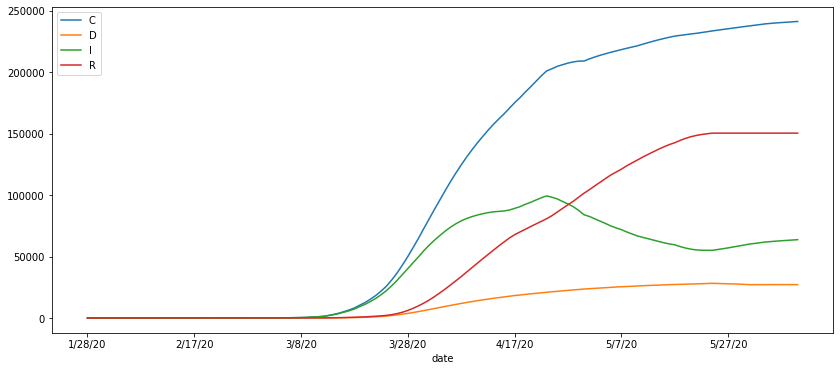

In [167]:
data.Spain.droplevel(0, axis=1).plot()

In [168]:
data = data.sum(axis=1, level=[0,2])
data.head()

Country Afghanistan          Albania          Algeria     ... Yemen    Zambia  \
                  C  D  I  R       C  D  I  R       C  D  ...     I  R      C   
date                                                      ...                   
1/28/20           0  0  0  0       0  0  0  0       0  0  ...     0  0      0   
1/29/20           0  0  0  0       0  0  0  0       0  0  ...     0  0      0   
1/30/20           0  0  0  0       0  0  0  0       0  0  ...     0  0      0   
1/31/20           0  0  0  0       0  0  0  0       0  0  ...     0  0      0   
2/1/20            0  0  0  0       0  0  0  0       0  0  ...     0  0      0   

Country          Zimbabwe           
         D  I  R        C  D  I  R  
date                                
1/28/20  0  0  0        0  0  0  0  
1/29/20  0  0  0        0  0  0  0  
1/30/20  0  0  0        0  0  0  0  
1/31/20  0  0  0        0  0  0  0  
2/1/20   0  0  0        0  0  0  0  

[5 rows x 748 columns]

In [172]:
data.index = pd.to_datetime(data.index)
data

Country    Afghanistan                   Albania               Algeria       \
                     C    D      I     R       C   D    I    R       C    D   
date                                                                          
2020-01-28           0    0      0     0       0   0    0    0       0    0   
2020-01-29           0    0      0     0       0   0    0    0       0    0   
2020-01-30           0    0      0     0       0   0    0    0       0    0   
2020-01-31           0    0      0     0       0   0    0    0       0    0   
2020-02-01           0    0      0     0       0   0    0    0       0    0   
...                ...  ...    ...   ...     ...  ..  ...  ...     ...  ...   
2020-06-05       16611  277  14851  1482    1165  33  246  886    9614  667   
2020-06-06       17329  288  15482  1557    1181  33  252  895    9726  674   
2020-06-07       18063  303  16124  1636    1196  33  258  905    9834  682   
2020-06-08       18801  318  16741  1742    1214  33  265  915    9942  690   
2020-06-09       19508  334  17260  1913    1233  33  274  924   10050  698   

Country     ... Yemen     Zambia              Zimbabwe              
            ...     I   R      C  D    I    R        C  D    I   R  
date        ...                                                     
2020-01-28  ...     0   0      0  0    0    0        0  0    0   0  
2020-01-29  ...     0   0      0  0    0    0        0  0    0   0  
2020-01-30  ...     0   0      0  0    0    0        0  0    0   0  
2020-01-31  ...     0   0      0  0    0    0        0  0    0   0  
2020-02-01  ...     0   0      0  0    0    0        0  0    0   0  
...         ...   ...  ..    ... ..  ...  ...      ... ..  ...  ..  
2020-06-05  ...   282  16   1079  7  198  874      212  4  178  29  
2020-06-06  ...   300  17   1084  7  184  893      227  4  192  30  
2020-06-07  ...   317  18   1089  7  170  912      242  4  206  31  
2020-06-08  ...   332  20   1104  7  185  912      254  4  216  33  
2020-06-09  ...   343  21   1120  7  200  912      269  4  229  36  

[134 rows x 748 columns]

In [174]:
for country in data.columns.get_level_values(0):
    data[country].to_hdf("../data/ts-covid.hdf", key=country)

C:\Users\ariel\Anaconda3\envs\ml\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'Antigua and Barbuda'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\ariel\Anaconda3\envs\ml\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'Bosnia and Herzegovina'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\ariel\Anaconda3\envs\ml\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'Burkina Faso'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; 

C:\Users\ariel\Anaconda3\envs\ml\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'Saudi Arabia'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\ariel\Anaconda3\envs\ml\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'Sierra Leone'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\ariel\Anaconda3\envs\ml\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'South Africa'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()